### We’ll start by loading all the necessary libraries for our analysis and visualization.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')  # Change to a valid style from plt.style.available
df = pd.read_csv('titanic.csv')

###  Display the first few rows

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## View Basic Information
we can use various methods to understand the structure and content of dataset

In [14]:
print('Shape Of The DataFrame :' , df.shape)

Shape Of The DataFrame : (891, 12)


### Display summary statistics

In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


###  Display data types and missing values

getting summary of dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


this provides basic information of dataset 

## Check Fort Missing Values

here we can identify which columns have missing data and how many...

In [16]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


get descriptive statistics

In [17]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


## Exploring Categorial Data 

lets check the distribution of categorial variables

In [19]:
print(df['Pclass'].value_counts())

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [20]:
print(df['Sex'].value_counts)

<bound method IndexOpsMixin.value_counts of 0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object>


In [21]:
print(df['Embarked'].value_counts)

<bound method IndexOpsMixin.value_counts of 0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object>


#### Survival Count By gender 

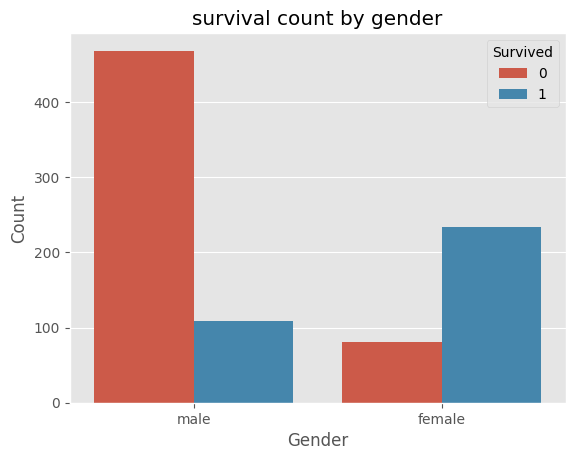

In [11]:
sns.countplot(data=df,x='Sex' , hue='Survived')
plt.title('survival count by gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### Fare Distribution By Passengers Class

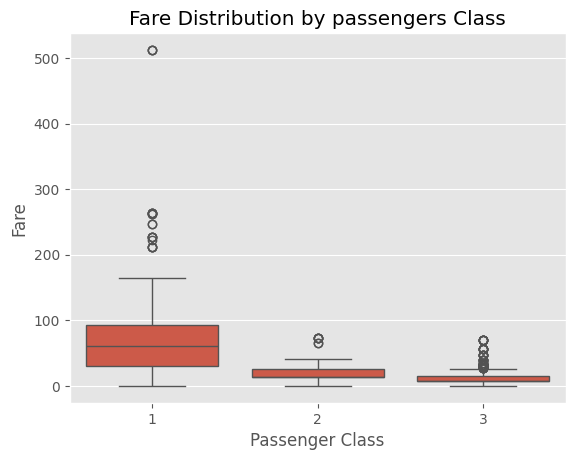

In [12]:
sns.boxplot(data=df , x='Pclass' , y='Fare')
plt.title('Fare Distribution by passengers Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

### Age Distribution Of Passengers

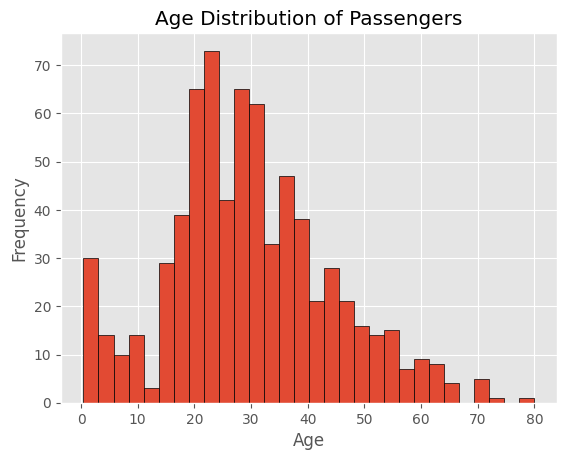

In [13]:
# Histogram of Age
plt.hist(df['Age'].dropna(), bins=30, edgecolor='black')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

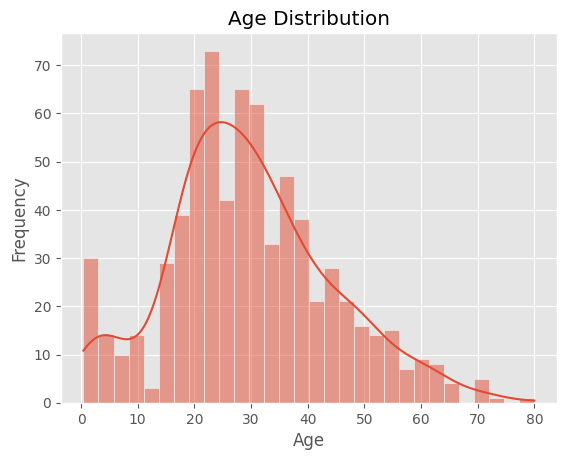

In [23]:
sns.histplot(df['Age'].dropna(),bins=30 , kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

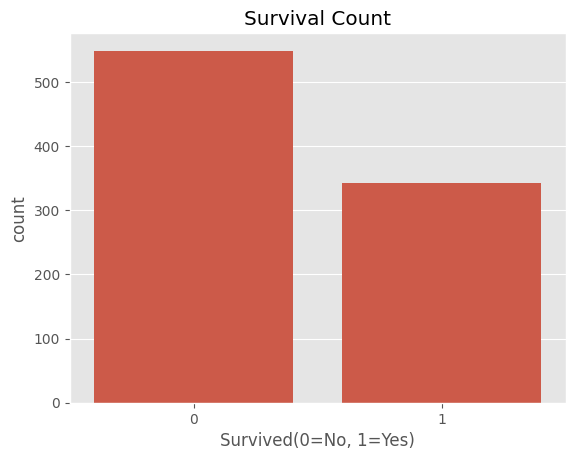

In [24]:
sns.countplot(data=df,x='Survived')
plt.title('Survival Count')
plt.xlabel('Survived(0=No, 1=Yes)')
plt.show()

## Handle Missing Values

handling missing values sometimes can affect data analysis

### Identify Missing Values
The first step in handling missing values is to identify them we can use isnull() use isnull to identify which columns have missing values and many 

In [28]:
missing_values = df.isnull().sum()
print(df.isnull().sum())
print(missing_values[missing_values>0])

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Age         177
Cabin       687
Embarked      2
dtype: int64


## Lets Decide on a Strategy 
dependinf on a context and the amount of missing data 

## Drop Rows or columns 

dropiing cabin becoz cabin have too many missing values

In [29]:
df.drop(columns=['Cabin'], inplace=True)

dropping rows where 'Embarked' And 'Survives' is missing 

In [30]:
df.dropna(subset=['Embarked'],inplace=True)

## Filling Missing Values

fill missing age values with median 

In [38]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [39]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [42]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [43]:
# Checking for any remaining missing values
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


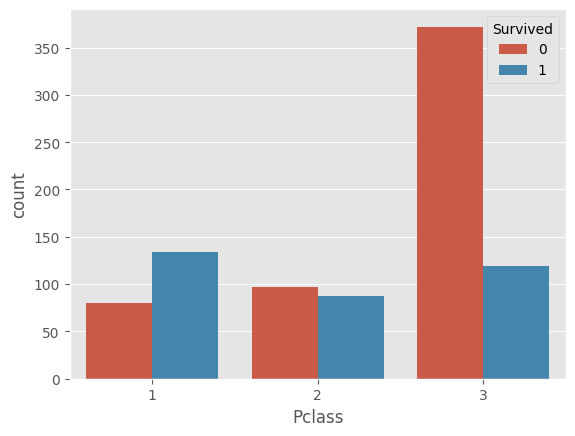

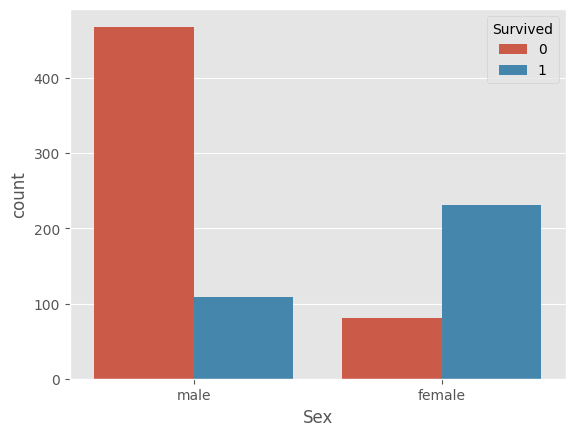

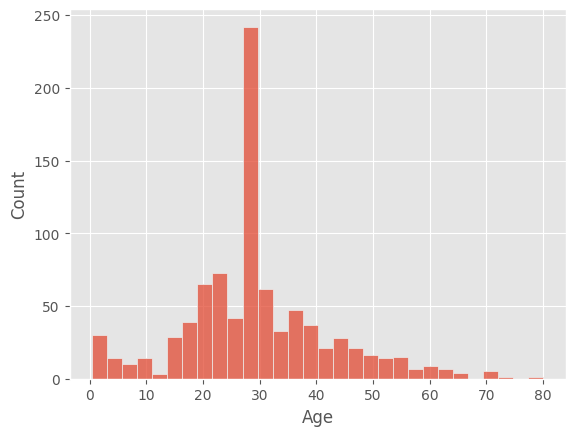

In [45]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.show()
sns.countplot(x='Sex', hue='Survived', data=df)
plt.show()
sns.histplot(df['Age'], bins=30)
plt.show()


## Data Type Conversion
ensure that the data type are appropriate for analysis

In [52]:
df['Sex']=df['Sex'].astype('category')
df['Embarked']=df['Embarked'].astype('category')

### Removing Duplicates

In [55]:
duplicates=df.duplicated().sum()
print("Number of Roes Duplicated :", duplicates)

Number of Roes Duplicated : 0


In [57]:
df.drop_duplicates(inplace=True)

## Outliers Detections

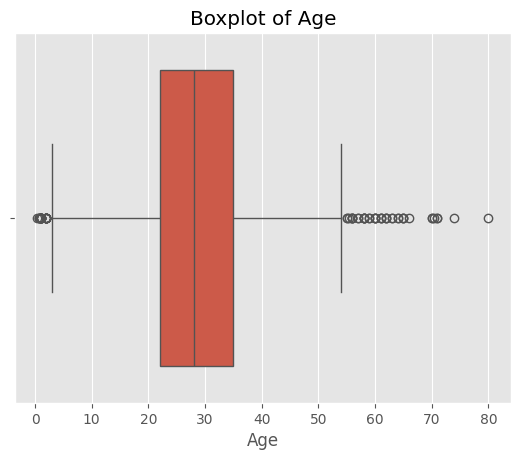

In [58]:
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()

## Handling Outliers

we can remove outliers based on specific thershold ( e.g using IQR methor)

In [65]:
upper_limit = df['Fare'].quantile(0.95)
df.loc[df['Fare']>upper_limit,'Fare']=upper_limit

In [66]:
upper_limit

np.float64(111.74431199999974)

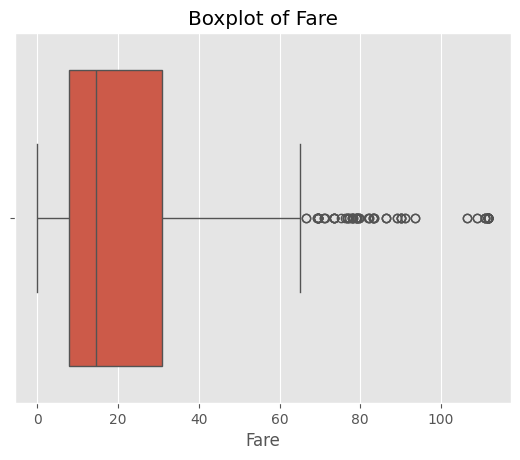

In [67]:
sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare')
plt.show()